In [1]:
import pandas as pd

"""client_id: Every client’s unique ID.
variation: Indicates if a client was part of the experiment.
visitor_id: A unique ID for each client-device combination.
visit_id: A unique ID for each web visit/session.
process_step: Marks each step in the digital process.
date_time: Timestamp of each web activity.
clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
clnt_age: Indicates the age of the client.
gendr: Specifies the client’s gender.
num_accts: Denotes the number of accounts the client holds with Vanguard.
bal: Gives the total balance spread across all accounts for a particular client.
calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.
"""

In [2]:
df1=pd.read_csv(r'C:\Users\38095\Documents\GitHub\PROJECT_5\df_final_demo.txt')

In [3]:
df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
df1.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [5]:
# Assuming df is your DataFrame containing the variables
columns_to_clean = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

# Drop rows with missing values in the specified columns
cleaned_df1 = df1.dropna(subset=columns_to_clean)

In [6]:
cleaned_df1.isna().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [7]:
cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70594 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  float64
 2   clnt_tenure_mnth  70594 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  float64
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  float64
 8   logons_6_mnth     70594 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


In [8]:
df2=pd.read_csv(r'C:\Users\38095\Documents\GitHub\PROJECT_5\df_final_experiment_clients.txt')

In [9]:
df2

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [10]:
df2['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [11]:
df2.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [12]:
# Drop NaN values from the 'Variation' column
df2_cleaned = df2.dropna(subset=['Variation'])

# Count the values after dropping NaNs
variation_counts = df2_cleaned['Variation'].value_counts()
print(variation_counts)

Variation
Test       26968
Control    23532
Name: count, dtype: int64


In [13]:
df2_cleaned

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [14]:
#df2_cleaned filter between control and test group
control_group = df2_cleaned[df2_cleaned['Variation'] == 'Control']
test_group = df2_cleaned[df2_cleaned['Variation'] == 'Test']

# Display the number of clients in each group
print("Number of clients in Control group:", len(control_group))
print("Number of clients in Test group:", len(test_group))

Number of clients in Control group: 23532
Number of clients in Test group: 26968


In [15]:
df3=pd.read_csv(r'C:\Users\38095\Documents\GitHub\PROJECT_5\df_final_web_data_pt_1.txt')

In [16]:
df3

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [17]:
df4=pd.read_csv(r'C:\Users\38095\Documents\GitHub\PROJECT_5\df_final_web_data_pt_2.txt')

In [18]:
df4

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [19]:
#concat df3 and df4
process_df = pd.concat([df3,df4],ignore_index=True)
process_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [20]:
process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [21]:
process_df['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [22]:
# Assuming process_df, control_group, and test_group are your DataFrames

# Check for common 'client_id' in process_df and control_group
client_ids_control = set(control_group['client_id'])
client_ids_control
client_ids_test = set(test_group['client_id'])
client_ids_test

{2228228,
 6291464,
 8650786,
 5242916,
 2883620,
 1310756,
 4325419,
 4587564,
 3145774,
 6553647,
 6946866,
 1703992,
 3014716,
 8388674,
 7340109,
 5636190,
 1048676,
 786535,
 5898344,
 3801194,
 7209069,
 4456564,
 1704055,
 9044094,
 8519807,
 2359427,
 1441929,
 6422672,
 6029457,
 4980881,
 8388761,
 1179809,
 9437350,
 524455,
 6291626,
 7078059,
 3932330,
 6422707,
 4063413,
 6947005,
 3539134,
 524481,
 3408073,
 6553810,
 3670242,
 3145959,
 4587767,
 7733500,
 1310980,
 4718854,
 5898506,
 393489,
 6422805,
 2752791,
 6553881,
 6029600,
 5112102,
 3408170,
 9175342,
 1442097,
 5112115,
 2359607,
 7864632,
 9961785,
 5112160,
 7995744,
 262503,
 6947176,
 4850031,
 3277167,
 7340401,
 3670387,
 8257908,
 7209337,
 524675,
 6816135,
 2228618,
 6160780,
 2883982,
 4456851,
 6291861,
 786840,
 9961882,
 3408283,
 1835426,
 3015082,
 3539384,
 3932604,
 8257990,
 3015113,
 8913354,
 2621902,
 9175519,
 3539428,
 8651238,
 4325863,
 2753020,
 1966588,
 4194814,
 4325889,
 380161

In [23]:
check = 50500 - len(client_ids_control) - len(client_ids_test)

In [24]:
check

0

In [25]:
control_group = cleaned_df1[cleaned_df1['client_id'].isin(client_ids_control)]

# Filter rows for test group
test_group = cleaned_df1[cleaned_df1['client_id'].isin(client_ids_test)]

In [26]:
control_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
...,...,...,...,...,...,...,...,...,...
50486,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0
50491,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50494,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0


In [27]:
test_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
...,...,...,...,...,...,...,...,...,...
50492,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0


In [28]:
def assign_gender_proportionally(df, gender_column):
    # Count the number of clients for each gender
    male_count = df[df[gender_column] == 'M'].shape[0]
    female_count = df[df[gender_column] == 'F'].shape[0]
    undetermined_count = df[df[gender_column] == 'U'].shape[0]

    # Calculate the proportion of each gender relative to the total number of defined clients
    total_defined_count = male_count + female_count
    male_ratio = male_count / total_defined_count
    female_ratio = female_count / total_defined_count

    # Distribute "undetermined" clients proportionally based on the ratios of male and female genders
    undetermined_male_count = int(undetermined_count * male_ratio)
    undetermined_female_count = int(undetermined_count * female_ratio)

    # Assign gender to "undetermined" clients
    df.loc[df[gender_column] == 'U', gender_column] = 'M'  # Assign male gender
    df.loc[df[gender_column] == 'U', gender_column] = 'F'  # Assign female gender
    
    return df


In [29]:
contro_group = assign_gender_proportionally(control_group, 'gendr')
test_group = assign_gender_proportionally(test_group, 'gendr')

In [30]:
contro_group

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
1,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,M,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,M,2.0,27021.42,2.0,5.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
...,...,...,...,...,...,...,...,...,...
50486,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0
50491,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50494,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0


In [31]:
def group_by_client(df):
    """
    Groups the data by clients and separates steps and times into different columns.
    
    Parameters:
    df : pandas.DataFrame
        DataFrame with data containing columns 'client_id', 'process_step', and 'date_time'.
    
    Returns:
    pandas.DataFrame
        DataFrame where data is grouped by clients, and steps and times are in separate columns.
    """
    # Group the data by clients
    grouped_df = df.groupby("client_id")
    
    # Create a dictionary to store steps and times for each client
    data_dict = {"client_id": [], "step_1": [], "time_1": [], "step_2": [], "time_2": [],
                 "step_3": [], "time_3": [], "step_4": [], "time_4": [], "step_5": [], "time_5": []}
    
    # For each client, extract their steps and times and add them to the dictionary
    for client_id, group_data in grouped_df:
        # Get the steps and times for the current client
        steps = group_data["process_step"].tolist()[::-1]  # Reverse the list to start from the last step
        times = group_data["date_time"].tolist()[::-1]    # Reverse the list to match the reversed steps
        
        # Fill in the dictionary with steps and times
        for i in range(5):  # Assuming maximum of 5 steps
            if i < len(steps):
                data_dict[f"step_{i+1}"].append(steps[i])
                data_dict[f"time_{i+1}"].append(times[i])
            else:
                # If there are fewer than 5 steps, fill in with NaN
                data_dict[f"step_{i+1}"].append(None)
                data_dict[f"time_{i+1}"].append(None)
        
        # Add client_id to the dictionary
        data_dict["client_id"].append(client_id)
    
    # Create a DataFrame from the dictionary
    result_df = pd.DataFrame(data_dict)
    
    return result_df

In [32]:
process_df_with_steps = group_by_client(process_df)

In [33]:
process_df_with_steps

,client_id,step_1,time_1,step_2,time_2,step_3,time_3,step_4,time_4,step_5,time_5
0,169,start,2017-04-12 20:19:36,step_1,2017-04-12 20:19:45,step_2,2017-04-12 20:20:31,step_3,2017-04-12 20:22:05,confirm,2017-04-12 20:23:09
1,336,start,2017-06-01 07:26:55,start,2017-06-01 07:42:43,None,None,None,None,None,None
2,546,start,2017-06-17 10:03:29,step_1,2017-06-17 10:03:39,step_2,2017-06-17 10:03:52,step_3,2017-06-17 10:05:19,confirm,2017-06-17 10:05:42
3,555,start,2017-04-15 12:57:56,step_1,2017-04-15 12:58:03,step_2,2017-04-15 12:58:35,step_3,2017-04-15 13:00:14,confirm,2017-04-15 13:00:34
4,647,start,2017-04-12 15:41:28,step_1,2017-04-12 15:41:35,step_2,2017-04-12 15:41:53,step_3,2017-04-12 15:45:02,confirm,2017-04-12 15:47:45
...,...,...,...,...,...,...,...,...,...,...,...
120152,9999729,start,2017-05-08 16:08:25,step_1,2017-05-08 16:08:30,step_2,2017-05-08 16:08:40,step_3,2017-05-08 16:09:19,confirm,2017-05-08 16:09:40
120153,9999768,start,2017-06-03 18:05:10,step_1,2017-06-03 18:05:17,step_2,2017-06-03 18:05:44,step_3,2017-06-03 18:07:24,step_2,2017-06-03 18:09:22
120154,9999832,start,2017-05-16 16:46:03,step_1,2017-05-16 16:46:11,None,None,None,None,None,None
120155,9999839,start,2017-03-29 12:08:55,start,2017-03-29 12:11:32,step_1,2017-03-29 12:11:35,step_2,2017-03-29 12:11:50,step_3,2017-03-29 12:12:28


In [34]:
import pandas as pd

def group_by_client_start_end(df):
    """
    Groups the data by clients and includes the first and last steps made by each client,
    along with their start and end times.
    
    Parameters:
    df : pandas.DataFrame
        DataFrame with data containing columns 'client_id', 'process_step', and 'date_time'.
    
    Returns:
    pandas.DataFrame
        DataFrame where data is grouped by clients, including the first and last steps,
        the start time of the first step, and the end time of the last step.
    """
    # Convert 'date_time' column to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # Sort the dataframe by 'date_time' within each group
    df_sorted = df.sort_values(by=['client_id', 'date_time'])
    
    # Group the data by clients
    grouped_df = df_sorted.groupby("client_id")
    
    # Create a dictionary to store the data for each client
    data_dict = {"client_id": [], "start_step": [], "end_step": [], "start_time": [], "end_time": []}
    
    # For each client, extract the first and last steps and their start and end times
    for client_id, group_data in grouped_df:
        # Get the first step
        start_step = group_data["process_step"].iloc[0]
        
        # Get the last step
        end_step = group_data["process_step"].iloc[-1]
        
        # Get the start time of the first step
        start_time = group_data["date_time"].iloc[0]
        
        # Get the end time of the last step
        end_time = group_data["date_time"].iloc[-1]
        
        # Add the data to the dictionary
        data_dict["client_id"].append(client_id)
        data_dict["start_step"].append(start_step)
        data_dict["end_step"].append(end_step)
        data_dict["start_time"].append(start_time)
        data_dict["end_time"].append(end_time)
    
    # Create a DataFrame from the dictionary
    result_df = pd.DataFrame(data_dict)
    
    return result_df

In [36]:
process_df_by_client_last_step = group_by_client_start_end(process_df)
process_df_by_client_last_step

,client_id,start_step,end_step,start_time,end_time
0,169,start,confirm,2017-04-12 20:19:36,2017-04-12 20:23:09
1,336,start,start,2017-06-01 07:26:55,2017-06-01 07:42:43
2,546,start,confirm,2017-06-17 10:03:29,2017-06-17 10:05:42
3,555,start,confirm,2017-04-15 12:57:56,2017-04-15 13:00:34
4,647,start,confirm,2017-04-12 15:41:28,2017-04-12 15:47:45
...,...,...,...,...,...
120152,9999729,start,confirm,2017-04-05 13:40:49,2017-05-08 16:09:40
120153,9999768,start,confirm,2017-06-03 18:05:10,2017-06-03 18:13:16
120154,9999832,start,step_1,2017-05-16 16:46:03,2017-05-16 16:46:11
120155,9999839,start,confirm,2017-03-29 12:08:55,2017-03-29 12:13:03


In [38]:
process_df_by_client_last_step['end_step'].unique()

array(['confirm', 'start', 'step_1', 'step_2', 'step_3'], dtype=object)

In [40]:
control_group_with_steps = pd.merge(contro_group, process_df_by_client_last_step, on="client_id")

In [43]:
test_group_with_steps = pd.merge(test_group, process_df_by_client_last_step, on="client_id")

In [64]:
control_group_with_steps

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,start_step,end_step,start_time,end_time
0,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,start,confirm,2017-05-21 11:02:21,2017-05-21 11:07:16
1,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,start,start,2017-06-14 14:22:31,2017-06-14 14:22:31
2,3727881,5.0,71.0,30.5,M,2.0,23915.60,0.0,3.0,start,confirm,2017-03-29 13:54:15,2017-03-29 14:00:45
3,272934,5.0,66.0,58.5,M,2.0,27021.42,2.0,5.0,start,confirm,2017-04-05 16:49:52,2017-04-05 16:53:48
4,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,start,confirm,2017-03-29 11:52:45,2017-03-29 11:57:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,start,confirm,2017-04-05 14:08:22,2017-06-05 16:09:59
23522,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0,start,start,2017-04-07 21:48:01,2017-04-07 21:48:01
23523,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0,start,confirm,2017-05-24 09:57:16,2017-06-07 00:42:30
23524,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0,start,confirm,2017-04-10 12:16:03,2017-04-10 12:19:52


In [46]:
test_group_with_steps

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,start_step,end_step,start_time,end_time
0,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,start,confirm,2017-03-29 10:58:35,2017-04-02 11:51:13
1,1439522,5.0,64.0,32.0,M,2.0,52467.79,6.0,9.0,start,start,2017-04-06 09:28:02,2017-04-07 09:16:00
2,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,start,start,2017-04-06 19:03:46,2017-04-06 19:03:46
3,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,start,confirm,2017-04-06 10:38:33,2017-04-06 10:48:22
4,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,start,confirm,2017-03-30 12:22:29,2017-03-30 12:32:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,start,confirm,2017-06-20 16:48:49,2017-06-20 16:50:31
26957,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,start,confirm,2017-04-05 03:52:21,2017-04-05 16:37:58
26958,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,start,confirm,2017-04-05 13:15:29,2017-05-03 19:03:28
26959,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,start,confirm,2017-04-12 14:49:47,2017-04-12 15:01:19


Day 2 (Week 5)

For the project requirements and instructions for today’s tasks in full, please refer to the project brief. However, in order to keep on track you may refer to the daily goals outlined below:

By the end of the first two days, we recommend you have:

Done dataset discovery: Understood the nature and structure of your datasets using Python with libraries such as Pandas, Matplotlib, and Seaborn.
Carried out data cleaning and fix any problems if there are any.
Answered the following questions about demographics:
Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?
Carried out a client behaviour analysis to answer any additional relevant questions you think are important.

Day 3 (Week 5)

For the project requirements and instructions for today’s tasks in full, please refer to the project brief. However, in order to keep on track you may refer to the daily goals outlined below:

By the end of day, we recommend you have:

Reviewed KPI and Metrics material.
Discovered what key performance indicators (KPIs) will determine the success of the new design
Use at least completion rate, time spent on each step and error rates. Add any KPIs you might find relevant.
Evaluated how the new design’s performance compare to the old one, given the chosen KPIs (completion rate, time spent on each step and error rates).

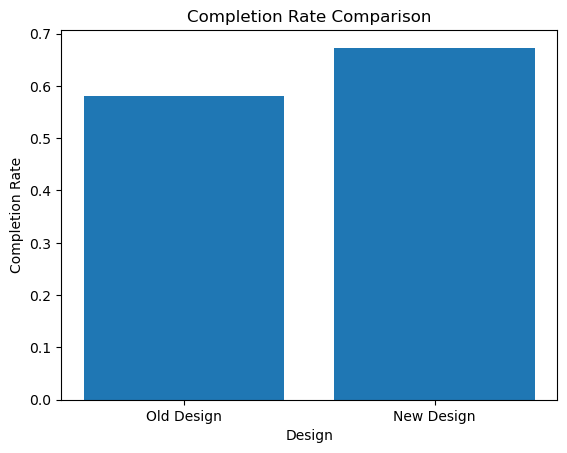

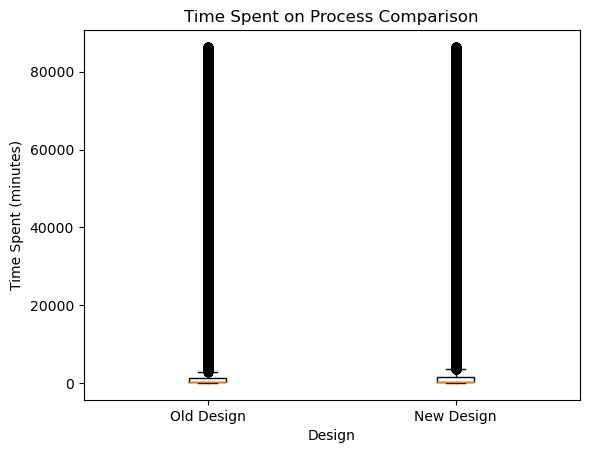

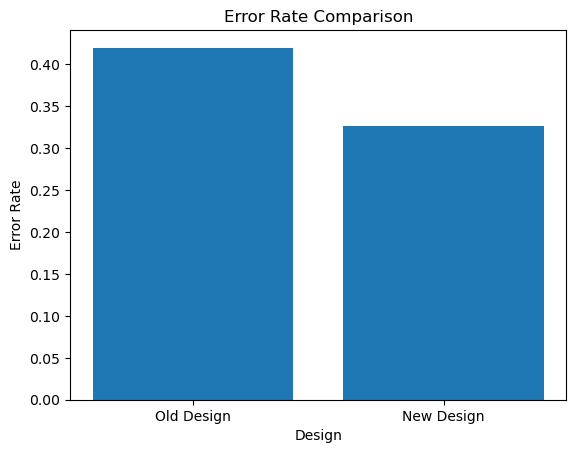

In [58]:
import matplotlib.pyplot as plt
# Step 1: Define Key Performance Indicators (KPIs)

# Step 2: Data Analysis

## Completion Rate Analysis
old_completion_rate = (control_group_with_steps['end_step'] == 'confirm').mean()
new_completion_rate = (test_group_with_steps['end_step'] == 'confirm').mean()

## Time Spent Analysis
old_time_spent = control_group_with_steps.groupby('client_id').apply(lambda x: x['end_time'].max() - x['start_time'].min())
new_time_spent = test_group_with_steps.groupby('client_id').apply(lambda x: x['end_time'].max() - x['start_time'].min())

## Error Rate Analysis
old_errors = control_group_with_steps[control_group_with_steps['end_step'] != 'confirm']
new_errors = test_group_with_steps[test_group_with_steps['end_step'] != 'confirm']

old_error_rate = len(old_errors) / len(control_group_with_steps)
new_error_rate = len(new_errors) / len(test_group_with_steps)

# Step 3: Visualization and Reporting

## Completion Rate Visualization
plt.bar(['Old Design', 'New Design'], [old_completion_rate, new_completion_rate])
plt.title('Completion Rate Comparison')
plt.xlabel('Design')
plt.ylabel('Completion Rate')
plt.show()

## Time Spent Visualization
plt.boxplot([old_time_spent.dt.seconds/60, new_time_spent.dt.seconds/60], labels=['Old Design', 'New Design'])
plt.title('Time Spent on Process Comparison')
plt.xlabel('Design')
plt.ylabel('Time Spent (minutes)')
plt.show()

## Error Rate Visualization
plt.bar(['Old Design', 'New Design'], [old_error_rate, new_error_rate])
plt.title('Error Rate Comparison')
plt.xlabel('Design')
plt.ylabel('Error Rate')
plt.show()



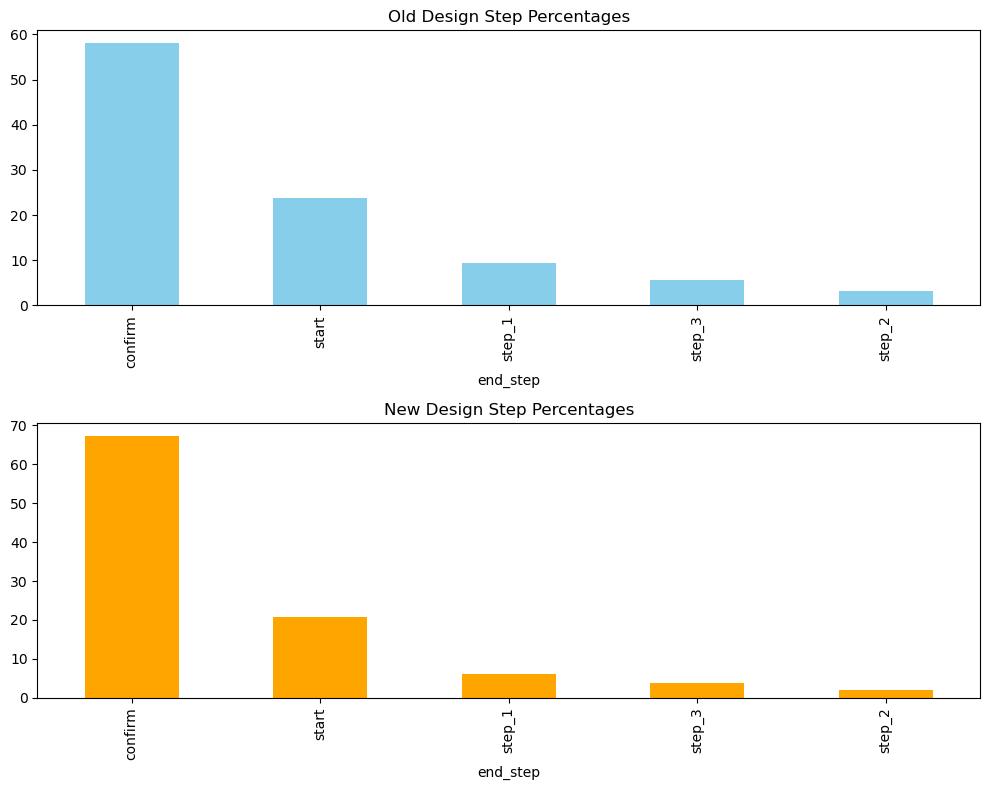

In [55]:
# Calculate step percentages
def calculate_step_percentages(data):
    step_counts = data['end_step'].value_counts(normalize=True) * 100
    return step_counts

## Step Analysis Visualization
old_step_percentages = calculate_step_percentages(control_group_with_steps)
new_step_percentages = calculate_step_percentages(test_group_with_steps)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

old_step_percentages.plot(kind='bar', ax=axes[0], color='skyblue')
new_step_percentages.plot(kind='bar', ax=axes[1], color='orange')
axes[0].set_title('Old Design Step Percentages')
axes[1].set_title('New Design Step Percentages')
plt.tight_layout()
plt.show()

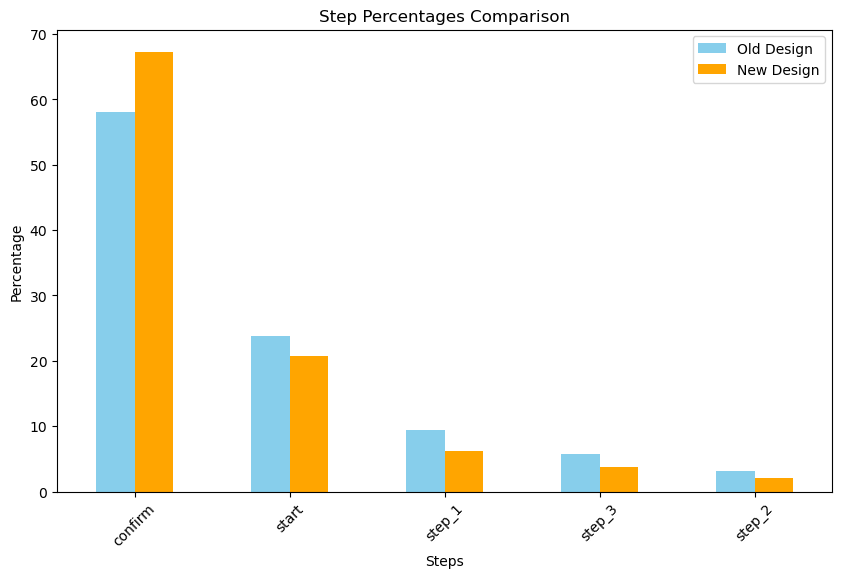

In [56]:
# Concatenate the step percentages dataframes along the columns axis
combined_step_percentages = pd.concat([old_step_percentages, new_step_percentages], axis=1)

# Plot the combined step percentages
combined_step_percentages.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Step Percentages Comparison')
plt.xlabel('Steps')
plt.ylabel('Percentage')
plt.legend(['Old Design', 'New Design'])
plt.xticks(rotation=45)
plt.show()

C:\Users\38095\AppData\Local\Temp\ipykernel_33952\2344923715.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\38095\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


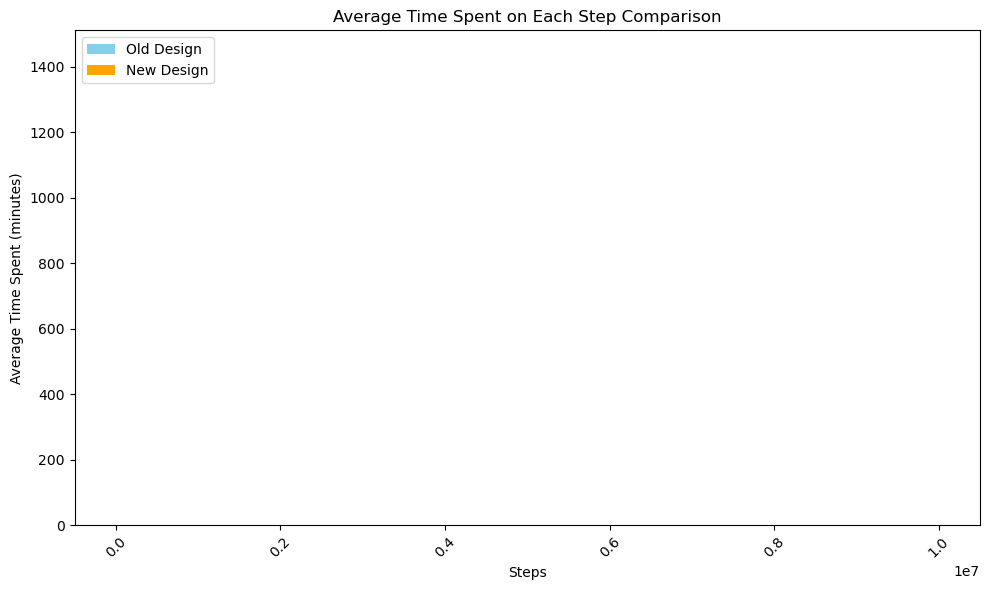

In [59]:
# Calculate average time spent on each step for old and new designs
old_avg_time = old_time_spent.groupby(old_time_spent.index).mean().dt.seconds / 60
new_avg_time = new_time_spent.groupby(new_time_spent.index).mean().dt.seconds / 60

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(old_avg_time.index, old_avg_time, color='skyblue', width=0.4, label='Old Design', align='center')
plt.bar(new_avg_time.index + 0.4, new_avg_time, color='orange', width=0.4, label='New Design', align='center')
plt.title('Average Time Spent on Each Step Comparison')
plt.xlabel('Steps')
plt.ylabel('Average Time Spent (minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Day 4 (Week 5)
For the project requirements and instructions for today’s tasks in full, please refer to the project brief. However, in order to keep on track you may refer to the daily goals outlined below:

By the end of both day 4 and day 5, we recommend you have:

Confirmed if the difference in completion rate of the the new design and the old design is statistically significant.
Carried out an analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold.
Carried out another hypothesis test of your choosing.
Evaluated the experiment by answering questions relating to:
Design Effectiveness
Duration
Additional Data Needs

In [61]:
# old_completion_rate = (control_group_with_steps['end_step'] == 'confirm').mean()
# new_completion_rate = (test_group_with_steps['end_step'] == 'confirm').mean()


import scipy.stats as stats

# 1. Confirm Statistical Significance of Completion Rate Difference
def test_completion_rate_difference(control_completion_rate, test_completion_rate):
    # Perform hypothesis test (e.g., z-test or chi-square test)
    # Assuming control_completion_rate and test_completion_rate are the completion rates
    # Calculate p-value
    p_value = stats.ttest_ind(control_completion_rate, test_completion_rate)[1]
    return p_value

# 2. Analyze Observed Increase in Completion Rate
def calculate_observed_increase(old_completion_rate, new_completion_rate):
    # Calculate observed increase in completion rate
    observed_increase = new_completion_rate - old_completion_rate
    return observed_increase

# 3. Carry Out Another Hypothesis Test
def additional_hypothesis_test(data1, data2):
    # Choose and perform another hypothesis test based on experiment objectives
    # Example: Test difference in time spent on each step between old and new designs
    # Perform appropriate statistical test
    # Example: stats.ttest_ind for comparing means of two samples
    _, p_value = stats.ttest_ind(data1, data2)
    return p_value

# 4. Evaluate the Experiment
def evaluate_experiment(completion_rate_difference, observed_increase, additional_test_p_value):
    # Print and analyze results
    print("Statistical Significance of Completion Rate Difference:")
    if completion_rate_difference < 0.05:
        print("The completion rate difference is statistically significant.")
    else:
        print("The completion rate difference is not statistically significant.")

    print("Observed Increase in Completion Rate:", observed_increase)
    if observed_increase >= 0.05:
        print("The observed increase meets or exceeds the 5% threshold.")
    else:
        print("The observed increase does not meet the 5% threshold.")

    print("Additional Hypothesis Test (e.g., time spent on each step):")
    if additional_test_p_value < 0.05:
        print("The difference in the additional metric is statistically significant.")
    else:
        print("The difference in the additional metric is not statistically significant.")

# Example usage
# control_completion_rate = [0.3, 0.35, 0.4, 0.45]  # Example completion rates for control group
# test_completion_rate = [0.35, 0.4, 0.45, 0.5]     # Example completion rates for test group

# 1. Confirm Statistical Significance
p_value = test_completion_rate_difference(old_completion_rate, new_completion_rate)

# 2. Analyze Observed Increase
observed_increase = calculate_observed_increase(old_completion_rate[0], new_completion_rate[0])

# 3. Carry Out Another Hypothesis Test (Example: Time spent on each step)
# additional_test_data1 = [10, 12, 15, 20]  # Example data for control group
# additional_test_data2 = [8, 11, 14, 18]   # Example data for test group
additional_test_p_value = additional_hypothesis_test(additional_test_data1, additional_test_data2)

# 4. Evaluate Experiment
evaluate_experiment(p_value, observed_increase, additional_test_p_value)


C:\Users\38095\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


IndexError: invalid index to scalar variable.

In [ ]:
# Сортировка данных
df_sorted = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

# Создание нового столбца с временем выполнения каждого шага
df_sorted['step_duration'] = df_sorted.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff()

# Убрать шаги, которые не являются последними в рамках каждого клиента, посетителя и визита
df_sorted = df_sorted[~df_sorted['process_step'].isin(['confirm'])]

# Посчитать среднее время выполнения для каждого шага
mean_step_duration = df_sorted.groupby('process_step')['step_duration'].mean()

# Вывести среднее время выполнения каждого шага
print(mean_step_duration)